<a href="https://colab.research.google.com/github/Trdemi/myFirstTest/blob/main/BIG_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: Demilade Adeyekun

Student ID: 21162550

# INITIALIZING **SPARK**

In [2]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.

INSTALL APACHE SPARK 3.2.1

In [3]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-05-20 01:00:15--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  26.6MB/s    in 11s     

2022-05-20 01:00:26 (24.4 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



UNZIP FOLDER

In [4]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

INSTALL AND LOCATE SPARK

In [5]:
!pip install -q findspark

SET PATH

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

LOCATE PATH

In [7]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

CREATE A SPARK SESSION AND SET APP NAME

In [8]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("BIG DATA ASSESSMENT")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [13]:
spark

#**EXPLORATORY** DATA ANALYSIS

In [ ]:
import pyspark.pandas as ps
import pandas as pd
from pyspark.sql.functions import round

LOAD CSV FILE 

In [ ]:
users_df = spark.read.csv("users.csv", header=True, inferSchema=True)

In [ ]:
users_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- userId: integer (nullable = true)
 |-- nick: string (nullable = true)
 |-- twitter: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- country: string (nullable = true)



SHOW DATA FRAME USING PANDAS

In [ ]:
users_df.toPandas()

,timestamp,userId,nick,twitter,dob,country
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC
...,...,...,...,...,...,...
2388,2016-06-11 05:17:17,2312,CJOHXgqKh,@ZomNVFWoF,1996-10-05,MT
2389,2016-06-14 03:19:04,100,lJexGia,@BYQ14xmNd,1987-05-25,CR
2390,2016-06-14 10:40:22,651,iynipG41EV,@nXTCcg7sV,1987-04-08,CI
2391,2016-06-15 16:33:25,2390,hH9wrFLdTt,@KimUIQF,1991-03-02,TK


IMPORT PYSPARK SQL FUNCTIONS

In [ ]:
from pyspark.sql.functions import to_date
from pyspark.sql.functions import year
users_df = users_df.withColumn("timestamp", to_date(users_df.timestamp))
users_df = users_df.withColumn("dob", to_date(users_df.dob))
users_df = users_df.withColumn("Age", year(users_df.timestamp)-year(users_df.dob))

In [ ]:
users_df.toPandas()

,timestamp,userId,nick,twitter,dob,country,Age
0,2012-06-19,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA,18
1,2012-06-19,949,vAOfUkf,@nkkNo,1971-04-22,HU,41
2,2012-06-20,1654,qOOXSQ,@SwOlw,1970-04-19,IS,42
3,2012-06-21,1586,px4gW51,@IrCHTnE,1965-11-23,AM,47
4,2012-06-21,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC,18
...,...,...,...,...,...,...,...
2388,2016-06-11,2312,CJOHXgqKh,@ZomNVFWoF,1996-10-05,MT,20
2389,2016-06-14,100,lJexGia,@BYQ14xmNd,1987-05-25,CR,29
2390,2016-06-14,651,iynipG41EV,@nXTCcg7sV,1987-04-08,CI,29
2391,2016-06-15,2390,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,25


In [ ]:
userSession_df = spark.read.csv("user-session.csv", header=True, inferSchema=True)

In [ ]:
userSession_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- assignmentId: integer (nullable = true)
 |-- sessionType: string (nullable = true)
 |-- teamLevel: integer (nullable = true)
 |-- platformType: string (nullable = true)



In [ ]:
userSession_df.toPandas()

,timestamp,userSessionId,userId,teamId,assignmentId,sessionType,teamLevel,platformType
0,2016-05-26 14:47:30,5675,170,90,5423,start,1,iphone
1,2016-05-27 00:06:54,5675,170,90,5423,end,1,iphone
2,2016-05-26 14:43:09,5795,835,39,5300,start,1,android
3,2016-05-27 08:06:54,5795,835,39,5300,end,1,android
4,2016-05-26 14:47:20,5833,624,2,5529,start,1,iphone
...,...,...,...,...,...,...,...,...
9245,2016-06-16 11:06:54,32496,1011,135,17708,end,6,android
9246,2016-06-13 09:06:54,33308,1228,135,32502,start,6,windows
9247,2016-06-16 11:06:54,33308,1228,135,32502,end,6,windows
9248,2016-06-15 17:06:54,38321,981,135,36067,start,6,iphone


In [ ]:
userSession_df = userSession_df.select('userId', 'teamId', 'platformType')
userSession_df = userSession_df.dropDuplicates(['userId'])

In [ ]:
userSession_df.toPandas()

,userId,teamId,platformType
0,0,157,iphone
1,1,99,android
2,2,22,iphone
3,6,77,iphone
4,8,124,iphone
...,...,...,...
1088,2383,8,android
1089,2384,27,windows
1090,2386,77,android
1091,2387,157,iphone


In [ ]:
data = users_df.join(userSession_df, on = 'userId', how = 'outer')

In [ ]:
data.count()

2393

In [ ]:
data.toPandas()

,userId,timestamp,nick,twitter,dob,country,Age,teamId,platformType
0,0,2015-11-27,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,66,157.0,iphone
1,1,2012-12-17,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,32,99.0,android
2,2,2013-03-18,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,31,22.0,iphone
3,3,2015-03-08,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,53,NaN,None
4,4,2015-07-02,nuubto,@U0eEX,1950-12-10,TO,65,NaN,None
...,...,...,...,...,...,...,...,...,...
2388,2388,2013-04-04,SP67Pry,@0Za771cOj,1995-12-19,TJ,18,NaN,None
2389,2389,2013-04-30,U0mTMwAG4J,@nxS820,1983-12-12,HK,30,57.0,android
2390,2390,2016-06-15,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,25,NaN,None
2391,2391,2014-01-06,5fZ9zu1,@SdP0z,1981-03-03,GA,33,NaN,None


In [ ]:
team_df = spark.read.csv("team.csv", header=True, inferSchema=True)

In [ ]:
team_df.toPandas()

,teamId,name,teamCreationTime,teamEndTime,strength,currentLevel
0,79,O1uJX7C,2016-06-12 15:33:27,9999-12-31 23:59:59,0.774474,1
1,92,WeLHp8HZ,2016-06-12 21:54:20,9999-12-31 23:59:59,0.171926,1
2,6,mARlfz,2016-06-12 23:02:16,9999-12-31 23:59:59,0.537353,1
3,7,xO41jlAo0Y,2016-06-13 06:03:03,9999-12-31 23:59:59,0.394370,1
4,40,vdwO0k1,2016-06-13 07:01:03,9999-12-31 23:59:59,0.706833,1
...,...,...,...,...,...,...
104,143,PtTdlOTqmQE,2016-06-02 17:36:54,2016-06-02 22:06:54,0.060460,1
105,161,vBm7Odv,2016-06-07 19:36:54,2016-06-08 06:06:54,0.994851,1
106,165,ZLKJDq,2016-06-09 01:06:54,2016-06-09 20:06:54,0.073988,1
107,171,h53FOIyWf8,2016-06-10 11:06:54,2016-06-10 14:06:54,0.225849,1


In [ ]:
team_df = team_df.select('teamId', 'strength')
team_df = team_df.dropDuplicates(['teamId'])

In [ ]:
team_df.toPandas()

,teamId,strength
0,31,0.913883
1,85,0.132215
2,65,0.038213
3,53,0.237000
4,78,0.796923
...,...,...
104,0,0.174880
105,18,0.885470
106,74,0.484140
107,36,0.642122


In [ ]:
data = data.join(team_df, on = 'teamId', how = 'outer')

In [ ]:
data.toPandas()

,teamId,userId,timestamp,nick,twitter,dob,country,Age,platformType,strength
0,NaN,3.0,2015-03-08,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,53.0,None,NaN
1,NaN,4.0,2015-07-02,nuubto,@U0eEX,1950-12-10,TO,65.0,None,NaN
2,NaN,5.0,2013-12-25,Ls5CGWqVus,@ygWiqAHR,1997-07-11,ST,16.0,None,NaN
3,NaN,7.0,2015-10-05,YXEMpCb2,@YMzAcB,1948-03-20,TF,67.0,None,NaN
4,NaN,11.0,2016-01-24,cERkN5Zq,@LMhNpt6,1990-01-09,KI,26.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...
2453,173.0,26.0,2016-05-19,Fqoksu9,@WElcqj9,1984-10-19,MM,32.0,windows,NaN
2454,173.0,1786.0,2015-09-11,8Ct743g,@WUiwX0,1989-10-05,EC,26.0,android,NaN
2455,177.0,1371.0,2013-11-23,b3SUSB,@YqicOY9i,1969-09-01,TP,44.0,mac,NaN
2456,179.0,1335.0,2013-08-04,YmTBrL,@gWg1rXJEw,1981-06-25,GF,32.0,windows,NaN


In [ ]:
gameClicks_df = spark.read.csv("game-clicks.csv", header=True, inferSchema=True)

In [ ]:
gameClicks_df.toPandas()

,timestamp,clickId,userId,userSessionId,isHit,teamId,teamLevel
0,2016-05-26 15:06:55,105,1038,5916,0,25,1
1,2016-05-26 15:07:09,154,1099,5898,0,44,1
2,2016-05-26 15:07:14,229,899,5757,0,71,1
3,2016-05-26 15:07:14,322,2197,5854,0,99,1
4,2016-05-26 15:07:20,22,1362,5739,0,13,1
...,...,...,...,...,...,...,...
755801,2016-06-16 11:06:39,755047,664,38792,1,84,8
755802,2016-06-16 11:06:44,755006,2374,34634,1,72,8
755803,2016-06-16 11:06:46,755521,1402,33063,1,141,6
755804,2016-06-16 11:06:50,755592,290,37357,1,146,6


In [ ]:
from pyspark.sql.functions import count
from pyspark.sql.functions import sum
gameClicks_df = gameClicks_df.groupBy("userId").agg(sum("isHit").alias("sum_isHit"), count("clickId").alias("count_clickId"))

In [ ]:
gameClicks_df.dropDuplicates()

DataFrame[userId: int, sum_isHit: bigint, count_clickId: bigint]

In [ ]:
data = data.join(gameClicks_df, on = 'userId', how = 'outer')

In [ ]:
data.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId
0,NaN,0.0,None,None,None,None,None,NaN,None,0.174880,NaN,NaN
1,NaN,1.0,None,None,None,None,None,NaN,None,0.105268,NaN,NaN
2,NaN,3.0,None,None,None,None,None,NaN,None,0.575898,NaN,NaN
3,NaN,4.0,None,None,None,None,None,NaN,None,0.134575,NaN,NaN
4,NaN,5.0,None,None,None,None,None,NaN,None,0.275224,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2388.0,NaN,2013-04-04,SP67Pry,@0Za771cOj,1995-12-19,TJ,18.0,None,NaN,NaN,NaN
2454,2389.0,57.0,2013-04-30,U0mTMwAG4J,@nxS820,1983-12-12,HK,30.0,android,0.085990,105.0,915.0
2455,2390.0,NaN,2016-06-15,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,25.0,None,NaN,NaN,NaN
2456,2391.0,NaN,2014-01-06,5fZ9zu1,@SdP0z,1981-03-03,GA,33.0,None,NaN,NaN,NaN


In [ ]:
ad_df = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)

In [ ]:
ad_df = ad_df.groupBy('userId').agg(count('adId').alias('count_adId'))

In [ ]:
ad_df.dropDuplicates()

DataFrame[userId: int, count_adId: bigint]

In [ ]:
data = data.join(ad_df, on = 'userId', how = 'outer')

In [ ]:
data.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId,count_adId
0,NaN,0.0,None,None,None,None,None,NaN,None,0.174880,NaN,NaN,NaN
1,NaN,1.0,None,None,None,None,None,NaN,None,0.105268,NaN,NaN,NaN
2,NaN,3.0,None,None,None,None,None,NaN,None,0.575898,NaN,NaN,NaN
3,NaN,4.0,None,None,None,None,None,NaN,None,0.134575,NaN,NaN,NaN
4,NaN,5.0,None,None,None,None,None,NaN,None,0.275224,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2388.0,NaN,2013-04-04,SP67Pry,@0Za771cOj,1995-12-19,TJ,18.0,None,NaN,NaN,NaN,NaN
2454,2389.0,57.0,2013-04-30,U0mTMwAG4J,@nxS820,1983-12-12,HK,30.0,android,0.085990,105.0,915.0,NaN
2455,2390.0,NaN,2016-06-15,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,25.0,None,NaN,NaN,NaN,NaN
2456,2391.0,NaN,2014-01-06,5fZ9zu1,@SdP0z,1981-03-03,GA,33.0,None,NaN,NaN,NaN,NaN


In [ ]:
buy_df = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)

In [ ]:
buy_df.toPandas()

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0
...,...,...,...,...,...,...,...
2942,2016-06-16 10:36:54,39838,34373,35,305,0,1.0
2943,2016-06-16 10:36:54,39839,37360,168,2016,1,2.0
2944,2016-06-16 10:36:54,39840,34542,64,68,2,3.0
2945,2016-06-16 10:36:54,39841,38277,27,667,4,10.0


In [ ]:
buy_df = buy_df.groupBy('userId').agg(count('buyId').alias('count_buyId'), sum('price').alias('sum_price'))
buy_df.dropDuplicates()

DataFrame[userId: int, count_buyId: bigint, sum_price: double]

In [ ]:
data = data.join(buy_df, on = 'userId', how = 'outer')

In [ ]:
data.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId,count_adId,count_buyId,sum_price
0,NaN,0.0,None,None,None,None,None,NaN,None,0.174880,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,None,None,None,None,None,NaN,None,0.105268,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,None,None,None,None,None,NaN,None,0.575898,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,None,None,None,None,None,NaN,None,0.134575,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,None,None,None,None,None,NaN,None,0.275224,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2388.0,NaN,2013-04-04,SP67Pry,@0Za771cOj,1995-12-19,TJ,18.0,None,NaN,NaN,NaN,NaN,NaN,NaN
2454,2389.0,57.0,2013-04-30,U0mTMwAG4J,@nxS820,1983-12-12,HK,30.0,android,0.085990,105.0,915.0,NaN,NaN,NaN
2455,2390.0,NaN,2016-06-15,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,25.0,None,NaN,NaN,NaN,NaN,NaN,NaN
2456,2391.0,NaN,2014-01-06,5fZ9zu1,@SdP0z,1981-03-03,GA,33.0,None,NaN,NaN,NaN,NaN,NaN,NaN


SHOW FINAL DATASET USING PANDAS

In [ ]:
Final_data = data.na.drop(subset = 'userId')
Final_data.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,sum_isHit,count_clickId,count_adId,count_buyId,sum_price
0,0,157.0,2015-11-27,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,66,iphone,NaN,143.0,1355.0,NaN,NaN,NaN
1,1,99.0,2012-12-17,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,32,android,0.893054,96.0,716.0,44.0,9.0,21.0
2,2,22.0,2013-03-18,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,31,iphone,0.472692,22.0,231.0,NaN,NaN,NaN
3,3,NaN,2015-03-08,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,53,None,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,2015-07-02,nuubto,@U0eEX,1950-12-10,TO,65,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2388,NaN,2013-04-04,SP67Pry,@0Za771cOj,1995-12-19,TJ,18,None,NaN,NaN,NaN,NaN,NaN,NaN
2389,2389,57.0,2013-04-30,U0mTMwAG4J,@nxS820,1983-12-12,HK,30,android,0.085990,105.0,915.0,NaN,NaN,NaN
2390,2390,NaN,2016-06-15,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,25,None,NaN,NaN,NaN,NaN,NaN,NaN
2391,2391,NaN,2014-01-06,5fZ9zu1,@SdP0z,1981-03-03,GA,33,None,NaN,NaN,NaN,NaN,NaN,NaN


RENAME COLUMNS

In [ ]:
Final_data = Final_data.withColumnRenamed('sum_isHit', 'Total_Hit').withColumnRenamed('count_clickId', 'Game_Clicked_Count').withColumnRenamed('count_adId', 'Ad_Count').withColumnRenamed('count_buyId', 'Purchase_count').withColumnRenamed('sum_price', 'Total_Purchase')

In [ ]:
Final_data = Final_data.withColumn('Bought_items', (Final_data.Total_Purchase >= 1).cast('integer'))

In [ ]:
Final_data.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
0,0,157.0,2015-11-27,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,66,iphone,NaN,143.0,1355.0,NaN,NaN,NaN,NaN
1,1,99.0,2012-12-17,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,32,android,0.893054,96.0,716.0,44.0,9.0,21.0,1.0
2,2,22.0,2013-03-18,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,31,iphone,0.472692,22.0,231.0,NaN,NaN,NaN,NaN
3,3,NaN,2015-03-08,9cJb2cpup,@bs5XuAR1g,1962-11-13,NR,53,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,2015-07-02,nuubto,@U0eEX,1950-12-10,TO,65,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2388,NaN,2013-04-04,SP67Pry,@0Za771cOj,1995-12-19,TJ,18,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,2389,57.0,2013-04-30,U0mTMwAG4J,@nxS820,1983-12-12,HK,30,android,0.085990,105.0,915.0,NaN,NaN,NaN,NaN
2390,2390,NaN,2016-06-15,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,25,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2391,2391,NaN,2014-01-06,5fZ9zu1,@SdP0z,1981-03-03,GA,33,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


REMOVE NULL VALUES

In [ ]:
#remove null values
from pyspark.sql.functions import when
from pyspark.sql.functions import col
Final_data.select([count(when(col(c).isNull(), c)).alias(c) for c in Final_data.columns]).show()

+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|userId|teamId|timestamp|nick|twitter|dob|country|Age|platformType|strength|Total_Hit|Game_Clicked_Count|Ad_Count|Purchase_count|Total_Purchase|Bought_items|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|     0|  1300|        0|   0|      0|  0|      0|  0|        1300|    1691|     1200|              1200|    1796|          1847|          1847|        1847|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+



In [ ]:
Final_data = Final_data.fillna(value = 0, subset = ['teamId'])
Final_data = Final_data.fillna(value = 'No Platform', subset = ['platformType'])
Final_data = Final_data.fillna(value = 0, subset = ['strength'])
Final_data = Final_data.fillna(value = 0, subset = ['Total_Hit'])
Final_data = Final_data.fillna(value = 0, subset = ['Game_Clicked_Count'])
Final_data = Final_data.fillna(value = 0, subset = ['Ad_Count'])
Final_data = Final_data.fillna(value = 0, subset = ['Purchase_count'])
Final_data = Final_data.fillna(value = 0, subset = ['Total_Purchase'])
Final_data = Final_data.fillna(value = 0, subset = ['Bought_Items'])

REPLACE NULL VALUES WITH 0

In [ ]:
Final_data.select([count(when(col(c).isNull(), c)).alias(c) for c in Final_data.columns]).show()

+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|userId|teamId|timestamp|nick|twitter|dob|country|Age|platformType|strength|Total_Hit|Game_Clicked_Count|Ad_Count|Purchase_count|Total_Purchase|Bought_items|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+
|     0|     0|        0|   0|      0|  0|      0|  0|           0|       0|        0|                 0|       0|             0|             0|           0|
+------+------+---------+----+-------+---+-------+---+------------+--------+---------+------------------+--------+--------------+--------------+------------+



In [ ]:
Final_data.dtypes

[('userId', 'int'),
 ('teamId', 'int'),
 ('timestamp', 'date'),
 ('nick', 'string'),
 ('twitter', 'string'),
 ('dob', 'date'),
 ('country', 'string'),
 ('Age', 'int'),
 ('platformType', 'string'),
 ('strength', 'double'),
 ('Total_Hit', 'bigint'),
 ('Game_Clicked_Count', 'bigint'),
 ('Ad_Count', 'bigint'),
 ('Purchase_count', 'bigint'),
 ('Total_Purchase', 'double'),
 ('Bought_items', 'int')]

In [ ]:
Final_data = Final_data.withColumn('Total_Hit', Final_data.Total_Hit.cast('int'))
Final_data = Final_data.withColumn('Game_Clicked_Count', Final_data.Game_Clicked_Count.cast('int'))
Final_data = Final_data.withColumn('Ad_Count', Final_data.Ad_Count.cast('int'))
Final_data = Final_data.withColumn('Purchase_count', Final_data.Purchase_count.cast('int'))

CHECK FOR DUPLICATES

In [ ]:
#check for duplicates, data still has 2393rows x 16 columns
Final_data.distinct().toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
0,94,134,2013-05-20,72zMvHOfF70,@0RnC7,1964-12-03,HM,49,android,0.000000,82,694,0,0,0.0,0
1,209,97,2015-08-03,Fj3rHgf4VPa,@E3pVdu,1986-03-25,IR,29,mac,0.340788,78,623,0,0,0.0,0
2,247,0,2015-04-30,QHuxscLOj5,@k1lLtGi,1989-12-10,IO,26,No Platform,0.000000,0,0,0,0,0.0,0
3,253,75,2014-02-20,RdIPvIgfB3E,@oPJZ3,1995-09-18,YE,19,android,0.928967,87,690,53,5,13.0,1
4,353,0,2013-03-30,spY1o0,@Wdj4u4,1981-02-15,MP,32,No Platform,0.000000,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,1435,0,2013-12-31,7d5pM6,@K13Jm,1976-10-22,TJ,37,No Platform,0.000000,0,0,0,0,0.0,0
2389,1586,0,2012-06-21,px4gW51,@IrCHTnE,1965-11-23,AM,47,No Platform,0.000000,0,0,0,0,0.0,0
2390,1798,0,2014-04-04,FCIbxTu2K4R,@JPTRfU7eB,1996-04-10,AU,18,No Platform,0.000000,0,0,0,0,0.0,0
2391,1877,0,2013-07-29,gw2hfKxA,@7L9jS1f9Q,1979-05-28,NP,34,No Platform,0.000000,0,0,0,0,0.0,0


In [ ]:
df = Final_data.filter((Final_data.teamId != 0) | (Final_data.strength != 0) | (Final_data.Game_Clicked_Count != 0) | (Final_data.Purchase_count != 0))

In [ ]:
df.toPandas()

,userId,teamId,timestamp,nick,twitter,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
0,0,157,2015-11-27,hAV9Ztqdv,@MnFe4LCVQ,1949-01-15,UZ,66,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17,SmMidAFgJzx,@fFMbCs,1980-12-02,KM,32,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18,vk2cY6jSeQP,@7O77pO,1982-02-21,PE,31,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09,7BCMZOTj,@1R4BO,1958-03-02,NI,56,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10,Y76Urg,@qHXWI9,1994-01-15,GQ,21,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09,WSb8mU5JtXT,@UiNHXht4,1957-02-12,SN,59,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16,AUL84n,@BQ4Qm,1966-03-04,WS,48,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24,8xBk8tZO,@i4SEWN0,1996-05-02,PS,18,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25,xIZyvAd,@wG7Nm,1974-12-27,GU,39,iphone,0.000000,97,697,16,4,45.0,1


DROP REDUNDANT COLUMNS

In [ ]:
df = df.drop('nick', 'twitter')

In [ ]:
df.toPandas()

,userId,teamId,timestamp,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
0,0,157,2015-11-27,1949-01-15,UZ,66,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17,1980-12-02,KM,32,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18,1982-02-21,PE,31,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09,1958-03-02,NI,56,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10,1994-01-15,GQ,21,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09,1957-02-12,SN,59,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16,1966-03-04,WS,48,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24,1996-05-02,PS,18,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25,1974-12-27,GU,39,iphone,0.000000,97,697,16,4,45.0,1


0 FOR USERS THAT BOUGHT SOMETHING 

1 FOR USERS THAT DID NOT

In [ ]:
#percentage of 0's and 1's
df.groupBy('Bought_Items').agg(count('userID').alias('Count Bought Items')).toPandas()

,Bought_Items,Count Bought Items
0,1,546
1,0,647


In [ ]:
df.dtypes

[('userId', 'int'),
 ('teamId', 'int'),
 ('timestamp', 'date'),
 ('dob', 'date'),
 ('country', 'string'),
 ('Age', 'int'),
 ('platformType', 'string'),
 ('strength', 'double'),
 ('Total_Hit', 'int'),
 ('Game_Clicked_Count', 'int'),
 ('Ad_Count', 'int'),
 ('Purchase_count', 'int'),
 ('Total_Purchase', 'double'),
 ('Bought_items', 'int')]

In [ ]:
df = df.toPandas()

#**DATA** VISUALISATIONS

In [69]:
!pip install gmplot

IMPORT LIBRARY

In [70]:
import gmplot
from geopy.geocoders import Nominatim
import webbrowser
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

GENERATE LONG AND LAT

In [71]:
#Generate heatmap
geolocator = Nominatim(user_agent='geo')
def geolocate(country):
  try:
    loc = geolocator.geocode(country)
    return (loc.latitude, loc.longitude)
  except:
    return np.nan  

In [72]:
location = df['country']
coordinate = []
for i in location:
  coordinate.append(geolocate(i))

In [73]:
coordinate = pd.DataFrame(coordinate, columns=['Latitude', 'Longitude'])
coordinate = coordinate.dropna()

GENERATE HEATMAP

In [74]:
from pandas.io.parquet import FastParquetImpl
lat = coordinate['Latitude']
Long = coordinate['Longitude']
plot = gmplot.GoogleMapPlotter(53.81604806664296, -3.0548307614209813, 3)
plot.heatmap(lat, Long)
plot.draw('heatmap.html')
webbrowser.open_new_tab('heatmap.html')


False

DEVICES **USED**

In [75]:
from sys import platform
platform = df['platformType'].value_counts()
platform = pd.DataFrame(platform)
platform

,platformType
iphone,443
android,391
windows,152
No Platform,100
linux,55
mac,52


BAR CHART

[Text(0.5, 0, 'Count')]

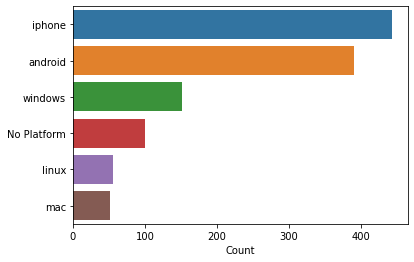

In [76]:
sns.barplot(x = 'platformType', y = platform.index, data = platform).set(xlabel = 'Count')

PIE CHART

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


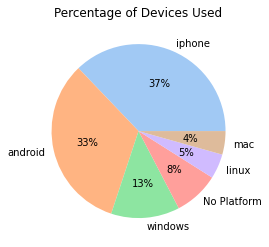

In [78]:
#Percentage of platform type
colors = sns.color_palette('pastel')
plt.pie(platform, labels=platform.index, colors=colors, autopct='%.0f%%')
plt.title("Percentage of Devices Used")
plt.show()

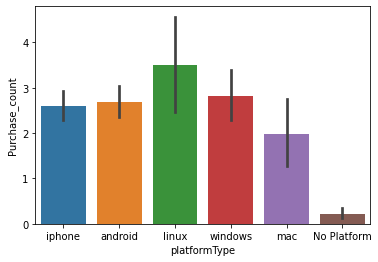

In [79]:
sns.barplot(x = 'platformType', y = 'Purchase_count', data = df)

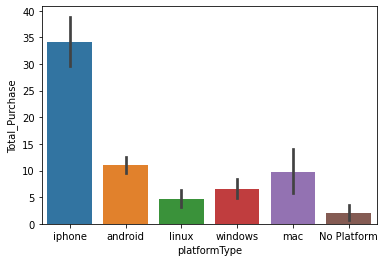

In [80]:
sns.barplot(x = 'platformType', y = 'Total_Purchase', data = df)

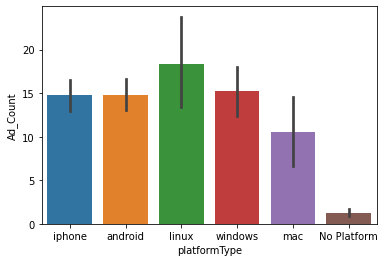

In [81]:
sns.barplot(x = 'platformType', y = 'Ad_Count', data = df)

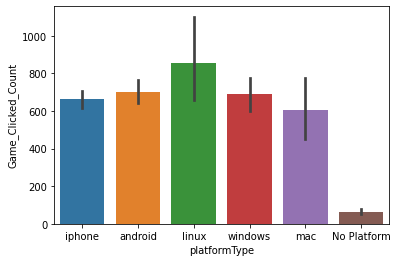

In [82]:
sns.barplot(x = 'platformType', y = 'Game_Clicked_Count', data = df)

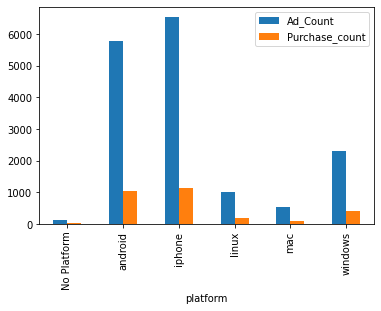

In [84]:
bars = df.groupby(['platformType']).sum()
bars['platform'] = bars.index
bars.plot(x = 'platform', y = ['Ad_Count', 'Purchase_count'], kind = 'bar')

In [85]:
bars

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items,platform
platformType,,,,,,,,,,,
No Platform,116550,0,3759,0.000000,693,6399,125,22,204.0,15,No Platform
android,475637,32148,15383,132.152852,29750,273431,5785,1049,4298.0,185,android
iphone,526421,35000,16565,152.305313,33060,292787,6542,1153,15146.0,215,iphone
linux,65445,4667,1801,15.164632,5090,47105,1012,192,255.0,31,linux
mac,60631,4447,1883,18.423599,3460,31468,548,103,501.0,25,mac
windows,179932,12310,5547,45.750404,11330,104616,2311,428,1003.0,75,windows


TOTAL PURCHASE DATA FRAME

In [86]:
df

,userId,teamId,timestamp,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
0,0,157,2015-11-27,1949-01-15,UZ,66,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17,1980-12-02,KM,32,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18,1982-02-21,PE,31,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09,1958-03-02,NI,56,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10,1994-01-15,GQ,21,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09,1957-02-12,SN,59,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16,1966-03-04,WS,48,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24,1996-05-02,PS,18,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25,1974-12-27,GU,39,iphone,0.000000,97,697,16,4,45.0,1


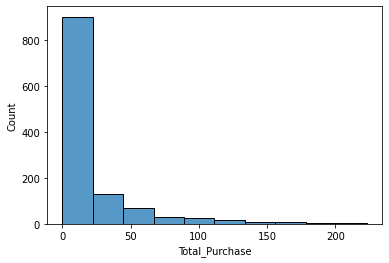

In [88]:
sns.histplot(data = df, x = 'Total_Purchase', bins = 10)

**CORRELATION** MATRIX

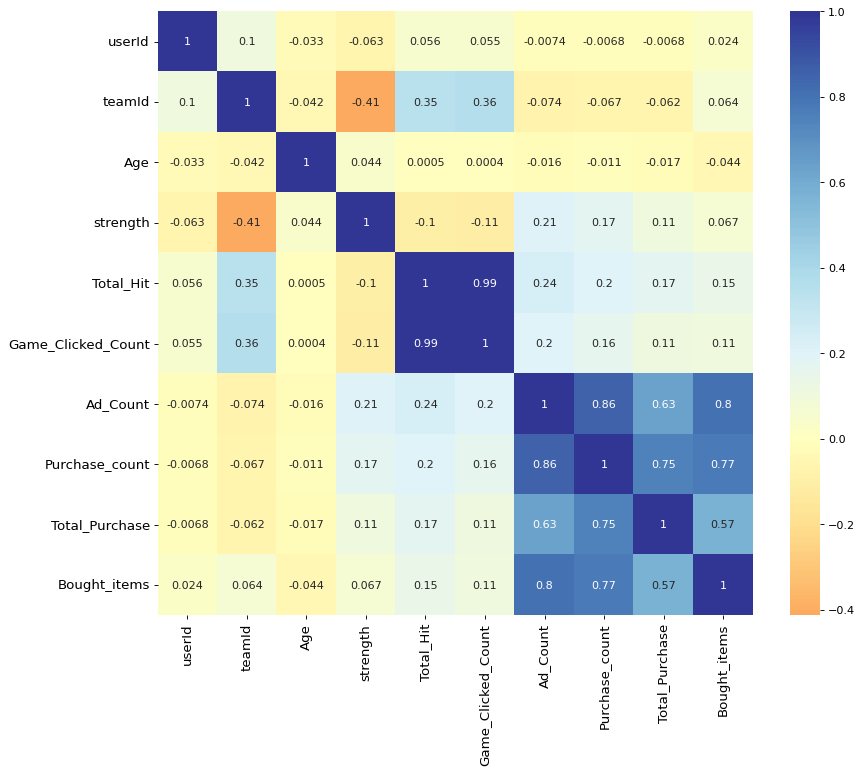

In [91]:
from IPython.core.pylabtools import figsize
plt.figure(figsize = (12,10), dpi = 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap = 'RdYlBu', center=0, annot = True)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [92]:
corr = df.corr()
corr

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
userId,1.000000,0.102401,-0.032736,-0.063359,0.055774,0.055243,-0.007424,-0.006849,-0.006783,0.024040
teamId,0.102401,1.000000,-0.041508,-0.412918,0.346417,0.360210,-0.074031,-0.067295,-0.062042,0.064353
Age,-0.032736,-0.041508,1.000000,0.043849,0.000496,0.000404,-0.015553,-0.011083,-0.017038,-0.044342
strength,-0.063359,-0.412918,0.043849,1.000000,-0.104017,-0.112394,0.206659,0.174365,0.109963,0.066632
Total_Hit,0.055774,0.346417,0.000496,-0.104017,1.000000,0.989686,0.238130,0.201146,0.174218,0.145124
Game_Clicked_Count,0.055243,0.360210,0.000404,-0.112394,0.989686,1.000000,0.196261,0.156320,0.112354,0.108364
Ad_Count,-0.007424,-0.074031,-0.015553,0.206659,0.238130,0.196261,1.000000,0.855557,0.633422,0.804675
Purchase_count,-0.006849,-0.067295,-0.011083,0.174365,0.201146,0.156320,0.855557,1.000000,0.746827,0.774441
Total_Purchase,-0.006783,-0.062042,-0.017038,0.109963,0.174218,0.112354,0.633422,0.746827,1.000000,0.574682
Bought_items,0.024040,0.064353,-0.044342,0.066632,0.145124,0.108364,0.804675,0.774441,0.574682,1.000000


PIE CHART

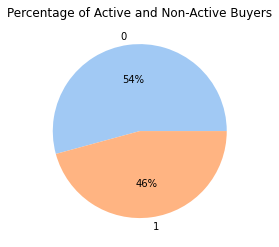

In [95]:
#Percentage of Items Purchased
purchase = df['Bought_items'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(purchase, labels = purchase.index, colors = colors, autopct='%.0f%%')
plt.title("Percentage of Active and Non-Active Buyers")
plt.show()

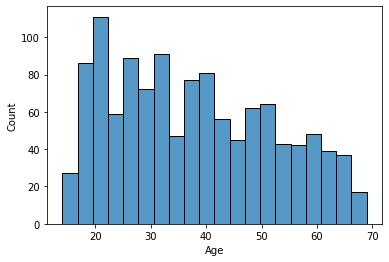

In [98]:
#Age distribution
age = df[['userId', 'Age']]
age.groupby('Age').count()
sns.histplot(data = age, x = 'Age', bins = 20)

In [99]:
df

,userId,teamId,timestamp,dob,country,Age,platformType,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
0,0,157,2015-11-27,1949-01-15,UZ,66,iphone,0.000000,143,1355,0,0,0.0,0
1,1,99,2012-12-17,1980-12-02,KM,32,android,0.893054,96,716,44,9,21.0,1
2,2,22,2013-03-18,1982-02-21,PE,31,iphone,0.472692,22,231,0,0,0.0,0
3,6,77,2014-02-09,1958-03-02,NI,56,iphone,0.793839,16,151,0,0,0.0,0
4,8,124,2015-04-10,1994-01-15,GQ,21,iphone,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,2016-01-09,1957-02-12,SN,59,android,0.908269,141,1270,46,4,18.0,1
1189,2384,27,2014-02-16,1966-03-04,WS,48,windows,0.141377,81,558,48,8,36.0,1
1190,2386,77,2014-09-24,1996-05-02,PS,18,android,0.793839,32,272,19,1,3.0,1
1191,2387,157,2013-03-25,1974-12-27,GU,39,iphone,0.000000,97,697,16,4,45.0,1


In [102]:
#Users with the most hits
user_hit = df[['userId', 'Total_Hit']]
user_hit = user_hit.groupby('userId').sum()
user_hit.sort_values(by = 'Total_Hit', ascending = False, inplace = True)
user_hit.head(5)

,Total_Hit
userId,
436,517
2356,504
1418,497
911,419
1000,403


In [103]:
#Teams with highest strength
team = df[['teamId', 'strength']]
team = team.groupby('teamId').sum()
team.sort_values(by = 'strength', ascending = False, inplace = True)
team.head(5)

,strength
teamId,
18,21.251277
35,19.229414
9,19.043511
99,16.074971
13,15.941975


**SUPERVISED** MACHINE LEARNING


# DECISION TREE

In [104]:
del df['timestamp']
del df['dob']
del df['country']
del df['platformType']

In [106]:
spark_df = spark.createDataFrame(df)
spark_df.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,Bought_items
0,0,157,66,0.000000,143,1355,0,0,0.0,0
1,1,99,32,0.893054,96,716,44,9,21.0,1
2,2,22,31,0.472692,22,231,0,0,0.0,0
3,6,77,56,0.793839,16,151,0,0,0.0,0
4,8,124,21,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,59,0.908269,141,1270,46,4,18.0,1
1189,2384,27,48,0.141377,81,558,48,8,36.0,1
1190,2386,77,18,0.793839,32,272,19,1,3.0,1
1191,2387,157,39,0.000000,97,697,16,4,45.0,1


In [107]:
spark_df.dtypes

[('userId', 'bigint'),
 ('teamId', 'bigint'),
 ('Age', 'bigint'),
 ('strength', 'double'),
 ('Total_Hit', 'bigint'),
 ('Game_Clicked_Count', 'bigint'),
 ('Ad_Count', 'bigint'),
 ('Purchase_count', 'bigint'),
 ('Total_Purchase', 'double'),
 ('Bought_items', 'bigint')]

In [108]:
spark_df = spark_df.withColumn('userId', spark_df.userId.cast('int'))
spark_df = spark_df.withColumn('teamId', spark_df.teamId.cast('int'))
spark_df = spark_df.withColumn('Age', spark_df.Age.cast('int'))
spark_df = spark_df.withColumn('strength', spark_df.strength.cast('double'))
spark_df = spark_df.withColumn('Total_Hit', spark_df.Total_Hit.cast('int'))
spark_df = spark_df.withColumn('Game_Clicked_Count', spark_df.Game_Clicked_Count.cast('int'))
spark_df = spark_df.withColumn('Ad_Count', spark_df.Ad_Count.cast('int'))
spark_df = spark_df.withColumn('Purchase_count', spark_df.Purchase_count.cast('int'))
spark_df = spark_df.withColumn('Bought_items', spark_df.Bought_items.cast('int'))
spark_df = spark_df.withColumnRenamed('Bought_Items', 'label')

In [109]:
spark_df.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label
0,0,157,66,0.000000,143,1355,0,0,0.0,0
1,1,99,32,0.893054,96,716,44,9,21.0,1
2,2,22,31,0.472692,22,231,0,0,0.0,0
3,6,77,56,0.793839,16,151,0,0,0.0,0
4,8,124,21,0.000000,38,380,10,5,53.0,1
...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,59,0.908269,141,1270,46,4,18.0,1
1189,2384,27,48,0.141377,81,558,48,8,36.0,1
1190,2386,77,18,0.793839,32,272,19,1,3.0,1
1191,2387,157,39,0.000000,97,697,16,4,45.0,1


In [111]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
assembler = VectorAssembler(inputCols=[
    'Age', 'strength', 'Total_Hit',
    'Game_Clicked_Count', 
    'Ad_Count',
    'Purchase_count', 'Total_Purchase'
], outputCol='features')

# Consolidate predictor columns
transform_df = assembler.transform(spark_df)

# Check the resulting column
transform_df.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label,features
0,0,157,66,0.000000,143,1355,0,0,0.0,0,"(66.0, 0.0, 143.0, 1355.0, 0.0, 0.0, 0.0)"
1,1,99,32,0.893054,96,716,44,9,21.0,1,"[32.0, 0.893053922676, 96.0, 716.0, 44.0, 9.0,..."
2,2,22,31,0.472692,22,231,0,0,0.0,0,"[31.0, 0.47269158141, 22.0, 231.0, 0.0, 0.0, 0.0]"
3,6,77,56,0.793839,16,151,0,0,0.0,0,"[56.0, 0.793839493486, 16.0, 151.0, 0.0, 0.0, ..."
4,8,124,21,0.000000,38,380,10,5,53.0,1,"[21.0, 0.0, 38.0, 380.0, 10.0, 5.0, 53.0]"
...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,59,0.908269,141,1270,46,4,18.0,1,"[59.0, 0.908268818406, 141.0, 1270.0, 46.0, 4...."
1189,2384,27,48,0.141377,81,558,48,8,36.0,1,"[48.0, 0.141376627543, 81.0, 558.0, 48.0, 8.0,..."
1190,2386,77,18,0.793839,32,272,19,1,3.0,1,"[18.0, 0.793839493486, 32.0, 272.0, 19.0, 1.0,..."
1191,2387,157,39,0.000000,97,697,16,4,45.0,1,"[39.0, 0.0, 97.0, 697.0, 16.0, 4.0, 45.0]"


In [112]:
# Split into training and test sets in a 80:20 ratio
train_df, test_df = transform_df.randomSplit([0.8, 0.2], seed=17)

# Check that training set has around 80% of records
training_ratio = train_df.count() / transform_df.count()
print(training_ratio)

0.8005029337803856


In [113]:
train_df.show()

+------+------+---+--------------+---------+------------------+--------+--------------+--------------+-----+--------------------+
|userId|teamId|Age|      strength|Total_Hit|Game_Clicked_Count|Ad_Count|Purchase_count|Total_Purchase|label|            features|
+------+------+---+--------------+---------+------------------+--------+--------------+--------------+-----+--------------------+
|     1|    99| 32|0.893053922676|       96|               716|      44|             9|          21.0|    1|[32.0,0.893053922...|
|     2|    22| 31| 0.47269158141|       22|               231|       0|             0|           0.0|    0|[31.0,0.472691581...|
|     6|    77| 56|0.793839493486|       16|               151|       0|             0|           0.0|    0|[56.0,0.793839493...|
|     8|   124| 21|           0.0|       38|               380|      10|             5|          53.0|    1|[21.0,0.0,38.0,38...|
|     9|    97| 57|0.340788463107|       62|               508|      37|             6|   

In [114]:
from pyspark.ml.classification import DecisionTreeClassifier

# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier()
tree_model = tree.fit(train_df)

# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(test_df)
prediction.select('label', 'prediction', 'probability').show(5, False)

+-----+----------+-----------+
|label|prediction|probability|
+-----+----------+-----------+
|0    |0.0       |[1.0,0.0]  |
|1    |1.0       |[0.0,1.0]  |
|0    |0.0       |[1.0,0.0]  |
|1    |1.0       |[0.0,1.0]  |
|0    |0.0       |[1.0,0.0]  |
+-----+----------+-----------+
only showing top 5 rows



In [115]:
# Create a confusion matrix
prediction.groupBy('label', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND label = prediction').count()
TP = prediction.filter('prediction = 1 AND label = prediction').count()
FN = prediction.filter('prediction = 0 AND label = 1').count()
FP = prediction.filter('prediction = 1 AND label = 0').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|  123|
|    1|       1.0|  115|
+-----+----------+-----+

1.0


# NAIVE BAYES

In [116]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [117]:
transform_df = transform_df.withColumnRenamed('Bought_items', 'label')

In [118]:
splits = transform_df.randomSplit([0.8, 0.2], seed=30)
df_train = splits[0]
df_test = splits[1]

In [119]:
# Apply the Naive bayes classifier
NB = NaiveBayes(modelType = 'multinomial')

# Train the model
nbmodel = NB.fit(df_train)

In [120]:
#Select rows to display
predictions_df = nbmodel.transform(df_test)
predictions_df.show(5)

+------+------+---+--------------+---------+------------------+--------+--------------+--------------+-----+--------------------+--------------------+--------------------+----------+
|userId|teamId|Age|      strength|Total_Hit|Game_Clicked_Count|Ad_Count|Purchase_count|Total_Purchase|label|            features|       rawPrediction|         probability|prediction|
+------+------+---+--------------+---------+------------------+--------+--------------+--------------+-----+--------------------+--------------------+--------------------+----------+
|     6|    77| 56|0.793839493486|       16|               151|       0|             0|           0.0|    0|[56.0,0.793839493...|[-230.78755335639...|[0.99999999999956...|       0.0|
|     8|   124| 21|           0.0|       38|               380|      10|             5|          53.0|    1|[21.0,0.0,38.0,38...|[-1024.0302892776...|[3.30082612350223...|       1.0|
|    12|    66| 18| 0.34348462196|       92|               704|      46|            1

In [121]:
#Compute accuracy on test
evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol = 'prediction', metricName = 'accuracy')
nb_accuracy = evaluator.evaluate(predictions_df)
print("Test set accuracy = " + str(nb_accuracy))

Test set accuracy = 0.9669421487603306


In [122]:
#Compute f1 on the test set
evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol = 'prediction', metricName = 'f1')
nb_f1 = evaluator.evaluate(predictions_df)
print("Test set F1-score = " + str(nb_f1))

Test set F1-score = 0.9669741882146299


In [123]:
#Compute recall on the test set
evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol = 'prediction', metricName = 'weightedRecall')
nb_recall = evaluator.evaluate(predictions_df)
print("Test set Recall = " + str(nb_recall))

Test set Recall = 0.9669421487603306


In [124]:
#Compute precision on the test set
evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol = 'prediction', metricName = 'weightedPrecision')
nb_precision = evaluator.evaluate(predictions_df)
print("Test set Precision = " + str(nb_precision))

Test set Precision = 0.967139737492519


**UNSUPERVISED** MACHINE LEARNING

# K-MEANS CLUSTERING

In [125]:
from pyspark.ml.feature import StandardScaler
scale = StandardScaler(inputCol='features',outputCol='standardized')
df_scale = scale.fit(transform_df)
df_scale_output = df_scale.transform(transform_df)
df_scale_output.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label,features,standardized
0,0,157,66,0.000000,143,1355,0,0,0.0,0,"(66.0, 0.0, 143.0, 1355.0, 0.0, 0.0, 0.0)","(4.590494394460984, 0.0, 2.1779050141890006, 2..."
1,1,99,32,0.893054,96,716,44,9,21.0,1,"[32.0, 0.893053922676, 96.0, 716.0, 44.0, 9.0,...","[2.225694251859871, 2.6583896488533307, 1.4620..."
2,2,22,31,0.472692,22,231,0,0,0.0,0,"[31.0, 0.47269158141, 22.0, 231.0, 0.0, 0.0, 0.0]","[2.15614130648925, 1.407080104810591, 0.335062..."
3,6,77,56,0.793839,16,151,0,0,0.0,0,"[56.0, 0.793839493486, 16.0, 151.0, 0.0, 0.0, ...","[3.8949649407547744, 2.363054053903734, 0.2436..."
4,8,124,21,0.000000,38,380,10,5,53.0,1,"[21.0, 0.0, 38.0, 380.0, 10.0, 5.0, 53.0]","[1.4606118527830403, 0.0, 0.5787439897844896, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,59,0.908269,141,1270,46,4,18.0,1,"[59.0, 0.908268818406, 141.0, 1270.0, 46.0, 4....","[4.1036237768666375, 2.703680442936421, 2.1474..."
1189,2384,27,48,0.141377,81,558,48,8,36.0,1,"[48.0, 0.141376627543, 81.0, 558.0, 48.0, 8.0,...","[3.3385413777898068, 0.42084151214960464, 1.23..."
1190,2386,77,18,0.793839,32,272,19,1,3.0,1,"[18.0, 0.793839493486, 32.0, 272.0, 19.0, 1.0,...","[1.2519530166711774, 2.363054053903734, 0.4873..."
1191,2387,157,39,0.000000,97,697,16,4,45.0,1,"[39.0, 0.0, 97.0, 697.0, 16.0, 4.0, 45.0]","[2.712564869454218, 0.0, 1.4773201844498813, 1..."


In [127]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(df_scale_output)
    output=KMeans_fit.transform(df_scale_output)
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)

Silhouette Score: 0.5266288001233596
Silhouette Score: 0.551415410475437
Silhouette Score: 0.506226063583678
Silhouette Score: 0.3990558817803231
Silhouette Score: 0.3601970264194656
Silhouette Score: 0.37100070352280373
Silhouette Score: 0.38901974309943815
Silhouette Score: 0.3772879244595167


Text(0, 0.5, 'cost')

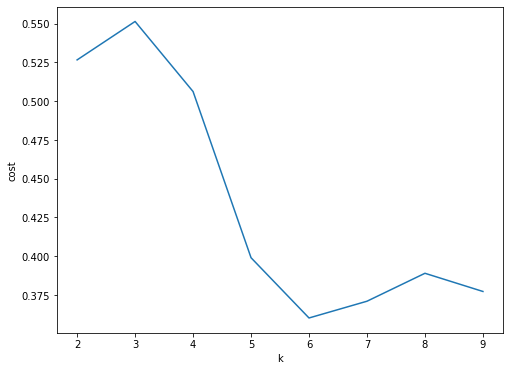

In [128]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [129]:
#Change K to 3
final_clustering=KMeans(featuresCol='standardized', k=3)
KMeans_fit=KMeans_algo.fit(df_scale_output)
clusters_output=KMeans_fit.transform(df_scale_output)
clusters_output.toPandas()

,userId,teamId,Age,strength,Total_Hit,Game_Clicked_Count,Ad_Count,Purchase_count,Total_Purchase,label,features,standardized,prediction
0,0,157,66,0.000000,143,1355,0,0,0.0,0,"(66.0, 0.0, 143.0, 1355.0, 0.0, 0.0, 0.0)","(4.590494394460984, 0.0, 2.1779050141890006, 2...",5
1,1,99,32,0.893054,96,716,44,9,21.0,1,"[32.0, 0.893053922676, 96.0, 716.0, 44.0, 9.0,...","[2.225694251859871, 2.6583896488533307, 1.4620...",4
2,2,22,31,0.472692,22,231,0,0,0.0,0,"[31.0, 0.47269158141, 22.0, 231.0, 0.0, 0.0, 0.0]","[2.15614130648925, 1.407080104810591, 0.335062...",2
3,6,77,56,0.793839,16,151,0,0,0.0,0,"[56.0, 0.793839493486, 16.0, 151.0, 0.0, 0.0, ...","[3.8949649407547744, 2.363054053903734, 0.2436...",2
4,8,124,21,0.000000,38,380,10,5,53.0,1,"[21.0, 0.0, 38.0, 380.0, 10.0, 5.0, 53.0]","[1.4606118527830403, 0.0, 0.5787439897844896, ...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2383,8,59,0.908269,141,1270,46,4,18.0,1,"[59.0, 0.908268818406, 141.0, 1270.0, 46.0, 4....","[4.1036237768666375, 2.703680442936421, 2.1474...",4
1189,2384,27,48,0.141377,81,558,48,8,36.0,1,"[48.0, 0.141376627543, 81.0, 558.0, 48.0, 8.0,...","[3.3385413777898068, 0.42084151214960464, 1.23...",8
1190,2386,77,18,0.793839,32,272,19,1,3.0,1,"[18.0, 0.793839493486, 32.0, 272.0, 19.0, 1.0,...","[1.2519530166711774, 2.363054053903734, 0.4873...",2
1191,2387,157,39,0.000000,97,697,16,4,45.0,1,"[39.0, 0.0, 97.0, 697.0, 16.0, 4.0, 45.0]","[2.712564869454218, 0.0, 1.4773201844498813, 1...",8
